## Assignment: Exploratory Data Analysis on NYC Taxi Trip Duration

Here is the description of all the variables / features available in the dataset which will help you to perform EDA:

- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
- trip_duration - (target) duration of the trip in seconds

## The aim of this assignment is just to explore the dataset and generate insights from it. 

### Step 1: Import Necessary Libraries

In [1]:
! pip install haversine

Defaulting to user installation because normal site-packages is not writeable


The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. Important in navigation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from haversine import haversine, Unit
from scipy.stats import skew, kurtosis
sns.set() 
%matplotlib inline

### Step 2: Import Dataset

In [3]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')

### Step 3: Exploring Dataset

In [4]:
# Let's check first 5 rows of the dataset
df.head()

id  vendor_id  ... store_and_fwd_flag trip_duration
0  id1080784          2  ...                  N           400
1  id0889885          1  ...                  N          1100
2  id0857912          2  ...                  N          1635
3  id3744273          2  ...                  N          1141
4  id0232939          1  ...                  N           848

[5 rows x 11 columns]

In [5]:
# Now check last 5 rows of the dataset
df.tail()

id  vendor_id  ... store_and_fwd_flag trip_duration
729317  id3905982          2  ...                  N           296
729318  id0102861          1  ...                  N           315
729319  id0439699          1  ...                  N           673
729320  id2078912          1  ...                  N           447
729321  id1053441          2  ...                  N          1224

[5 rows x 11 columns]

### Step 4: Data Analysis

In this section, we will start analyzing NYC taxi trip prediction dataset. We will use several functions and methods to determine the following:
- Size of the dataset
- Datatypes of each variable ( Features)
- The number of missing values
- The number of unique values per datatype
- The number of unique values per feature (variable)
- Generate summary of statistics for numerical and non numerical variables

### Step 4.1: Identify the variable and Datatype

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


From the above we can see the following:
- This dataset has 729732 rows and 11 columns (Features)
- The datatypes of these variables are 4 floats, 3 integers and 4 object type.
- This dataset has no null values
- This dataset has 2 features 'pickup_datetime' & 'dropoff_datetime'as a datatype of 'object'.We will need to change the datatype of these variables to 'datetime' datatype.
- Once we will change the datatype of the pickup_datetime & dropoff_datetime variables, we can create additional features of this dataset.
- The features pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude can be used to create new feature. This feature will contain the distance of each trip.
- Finally we can state that we have 10 independent variables and 1 dependant variable which will call the target variable.

### Checking for Null values


In [7]:
# First, let's get unique values for eiable
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

From the above, we can concldue that there are no missing values in the dataset

### Checking for Unique values

In [8]:
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

From the above, we can have following conclusions:
- There are no duplicate values in the id column
- There are only 2 vendors 1 or 2
- There are only 2 values for store_and_fwd_flag Ý, 'N'

### Checking Summary statistics for Numerical variables

In [9]:
df.describe()

vendor_id  passenger_count  ...  dropoff_latitude  trip_duration
count  729322.000000    729322.000000  ...     729322.000000   7.293220e+05
mean        1.535403         1.662055  ...         40.751775   9.522291e+02
std         0.498745         1.312446  ...          0.036037   3.864626e+03
min         1.000000         0.000000  ...         32.181141   1.000000e+00
25%         1.000000         1.000000  ...         40.735931   3.970000e+02
50%         2.000000         1.000000  ...         40.754509   6.630000e+02
75%         2.000000         2.000000  ...         40.769741   1.075000e+03
max         2.000000         9.000000  ...         43.921028   1.939736e+06

[8 rows x 7 columns]

From the above, we can observe the following:
- There are no null values in the numerical variables.
- The vendor_id column appears to only have two values, which means that there might be only two vendors.
- The passenger_count allow us to determine that most of the taxi trips include 1 -2 passangers. The max number of passenger is 9. We will need to check for the presence of outliers when we conduct our univariate analysis.
- The trip_duration column provides us the duration of each trip in seconds. We will analyze this column seperately to see if we see any outliers.

### Checking Summary statistics for Non Numerical variables

In [10]:
df.describe(include=object)

id      pickup_datetime     dropoff_datetime store_and_fwd_flag
count      729322               729322               729322             729322
unique     729322               709359               709308                  2
top     id1080784  2016-02-24 12:04:42  2016-02-19 19:25:04                  N
freq            1                    4                    4             725282

From the above, we can observe the following:
- There are no missing values on the non numerical columns
- id column is showing a ferquency of 1 which means there are unique values

### Step 4.2: Converting Features to the right Datatype

In this section, we will convert pickup_datetime and dropoff_datetime to DateTime datatype. A conversion of these 2 features to the right datatype will allow us to get a new features using datetime library

In [12]:
# # Changing the pickup_datetime and dropoff_datetime from object to datetime datatype

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [13]:
# Check the new datatype for pickup_datetime and dropoff_datetime

print(df['pickup_datetime'].dtypes)
print(df['dropoff_datetime'].dtypes)

datetime64[ns]
datetime64[ns]


### Step 4.3: Create New Features

In this section, we will create new features from the existing ones. We will create following geatures:
- Create new features using the pickup_datetime and dropoff_datetime columns
- Create a new feature 'distance using the pickup_longitude', 'pickup_latitude dropoff', 'dropoff_latitude' 
- Create a new feature 'average_speed' using the distance and trip_duration

### Step 4.3.1: Creating Features based on Date and Time

In this section we will create 8 new features using pickup_datetime and dropoff_datetime

In [15]:
# Create features based on month
df['pickup_by_month'] = df['pickup_datetime'].dt.month
df['dropoff_by_month'] = df['dropoff_datetime'].dt.month

In [16]:
# Creating features based on weekday

df['pickup_by_weekday'] = df['pickup_datetime'].dt.weekday
df['dropoff_by_weekday'] = df['dropoff_datetime'].dt.weekday

In [17]:
# Creating features based on day

df['pickup_by_day'] = df['pickup_datetime'].dt.day_name()
df['dropoff_by_day'] = df['dropoff_datetime'].dt.day_name()

In [18]:
# Creating features based on Hour

df['pickup_by_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_by_hour'] = df['dropoff_datetime'].dt.hour

Now that we have the pickup time and dropoff time, we can determine the part of the day they catagorize into. The day is divided into 4 parts as per the following:
- Morning, which starts at 6:01 am and ends at 12:oopm
- Afternoon, which starts at 12:01 pm and ends at 18:00pm
- Evening, which starts at 18:01 and ends at 21:00pm
- Night, which start at 21:01 and ends at 6:00am

In [19]:
# Write a function to determine part of the day catagorization
def part_of_day (time):
    if time in range (6,12):
        return 'Morning'
    elif time in range(12,18):
        return 'Afternoon'
    elif time in range (18,21):
        return 'Evening'
    else:
        return 'Night'

In [20]:
# Now using above function let's create 2 new features 'pickup_of_day', 'dropoff_part_of_day'
df['pickup_part_of_day'] = df['pickup_by_hour'].apply(part_of_day)
df['dropoff_part_of_day'] = df['dropoff_by_hour'].apply(part_of_day)

In [21]:
# Let's check formula integrity
df[['pickup_part_of_day', 'dropoff_part_of_day']].head()

pickup_part_of_day dropoff_part_of_day
0          Afternoon           Afternoon
1              Night               Night
2          Afternoon             Evening
3            Morning             Morning
4            Morning             Morning

### Step 4.3.2: Creating Features based on Location

- In this section we will use pickup_longitude, pickup_latitude, dropoff_longitude and the dropoff_latitude to create a new feature called 'distance'
- We will use Haversine python library to calculate the distance between the pickup coordinartes and the dropoff coordinates

In [22]:
point_a = (40.778873, -73.953918) # (lat, lon)
point_b = (40.771164, -73.963875)
haversine(point_a, point_b, unit=Unit.MILES)

0.7450687743487803

In [23]:
# Create a function to determine the distance between two coordinate
def trip_distance(pickup_latitude,pickup_longitude, dropoff_latitude,dropoff_longitude):
    start_coo = (pickup_latitude,pickup_longitude)
    finish_coo = (dropoff_latitude,dropoff_longitude)
    
    return haversine(start_coo,finish_coo, unit=Unit.MILES)

In [24]:
df['distance'] = df.apply(lambda x: trip_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']), axis=1)

In [25]:
# Let's check to see if distance has been calculated correctly or not
df['distance'] .head()

0    0.745070
1    2.565714
2    4.505415
3    1.467120
4    2.689630
Name: distance, dtype: float64

In [27]:
# We will create the speed feature using formula s = d/t ( miles per hour)
df['average_speed'] = df['distance'] / (df['trip_duration'] / 3600)

In [28]:
df['average_speed'].head().round(4)

0     6.7056
1     8.3969
2     9.9202
3     4.6289
4    11.4182
Name: average_speed, dtype: float64

### Step 4.3.3:  Checking New features created

In [29]:
# Display first 5 rows

df[['pickup_by_month','dropoff_by_month','pickup_by_weekday', 'dropoff_by_weekday','pickup_by_day','dropoff_by_day','pickup_by_hour','dropoff_by_hour','pickup_part_of_day','dropoff_part_of_day','distance','average_speed']].head()

pickup_by_month  dropoff_by_month  ...  distance  average_speed
0                2                 2  ...  0.745070       6.705632
1                3                 3  ...  2.565714       8.396883
2                2                 2  ...  4.505415       9.920180
3                1                 1  ...  1.467120       4.628950
4                2                 2  ...  2.689630      11.418240

[5 rows x 12 columns]

In [30]:
# Check on missing values
df.isnull().sum()

id                     0
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
pickup_by_month        0
dropoff_by_month       0
pickup_by_weekday      0
dropoff_by_weekday     0
pickup_by_day          0
dropoff_by_day         0
pickup_by_hour         0
dropoff_by_hour        0
pickup_part_of_day     0
dropoff_part_of_day    0
distance               0
average_speed          0
dtype: int64

In [31]:
df.describe()

vendor_id  ...  average_speed
count  729322.000000  ...  729322.000000
mean        1.535403  ...       8.961085
min         1.000000  ...       0.000000
25%         1.000000  ...       5.669591
50%         2.000000  ...       7.951591
75%         2.000000  ...      11.087711
max         2.000000  ...    3504.845312
std         0.498745  ...       7.668369

[8 rows x 17 columns]

### Step 4.4:  Univariate Analysis

In this section we will analyze each variable 

### Step 4.4.1:  Univariate Analysis for Target variable trip_duration

In [33]:
df['trip_duration'].describe().round(2)

count     729322.00
mean         952.23
std         3864.63
min            1.00
25%          397.00
50%          663.00
75%         1075.00
max      1939736.00
Name: trip_duration, dtype: float64

Above summary statistics is showing us the following:
- There are no missing values
- A trip duration will take 952.23 seconds
- We are seeing significant difference between max trip value and 75% quantile value. We will need to check for presene of outliers while we will conduct univariate analysis for trip_duration variable

In [34]:
# Calculate the skewness and kutorsis of the variable

def add_stat(x):
    m = df.loc[:,x].mode()
    s = skew(df[x].dropna())
    k = kurtosis(df[x].dropna())
    W, p = stats.shapiro(df['trip_duration'].dropna())
    print(f'Mode = {m}')
    print(f'Skew = {s}')
    print(f'Kurtosis = {k}')
    if p <= 0.5:
        print(f'Null hypothesis of normality is rejected.')
    else:
        print(f'Null hypothesis of normality is accepted.')

In [35]:
# Calculate additional statitics 
add_stat('trip_duration')

Mode = 0    348
Name: trip_duration, dtype: int64
Skew = 186.67805293547696
Kurtosis = 87141.8659722644
Null hypothesis of normality is rejected.


from the above, we can see that variable trip_duration has high kurtosis and it is skew. This is sindicating that the variable trip_duration is not normally distributed.

<Axes: title={'center': 'Histogram for Trip_Duration'}, xlabel='trip_duration', ylabel='Count'>

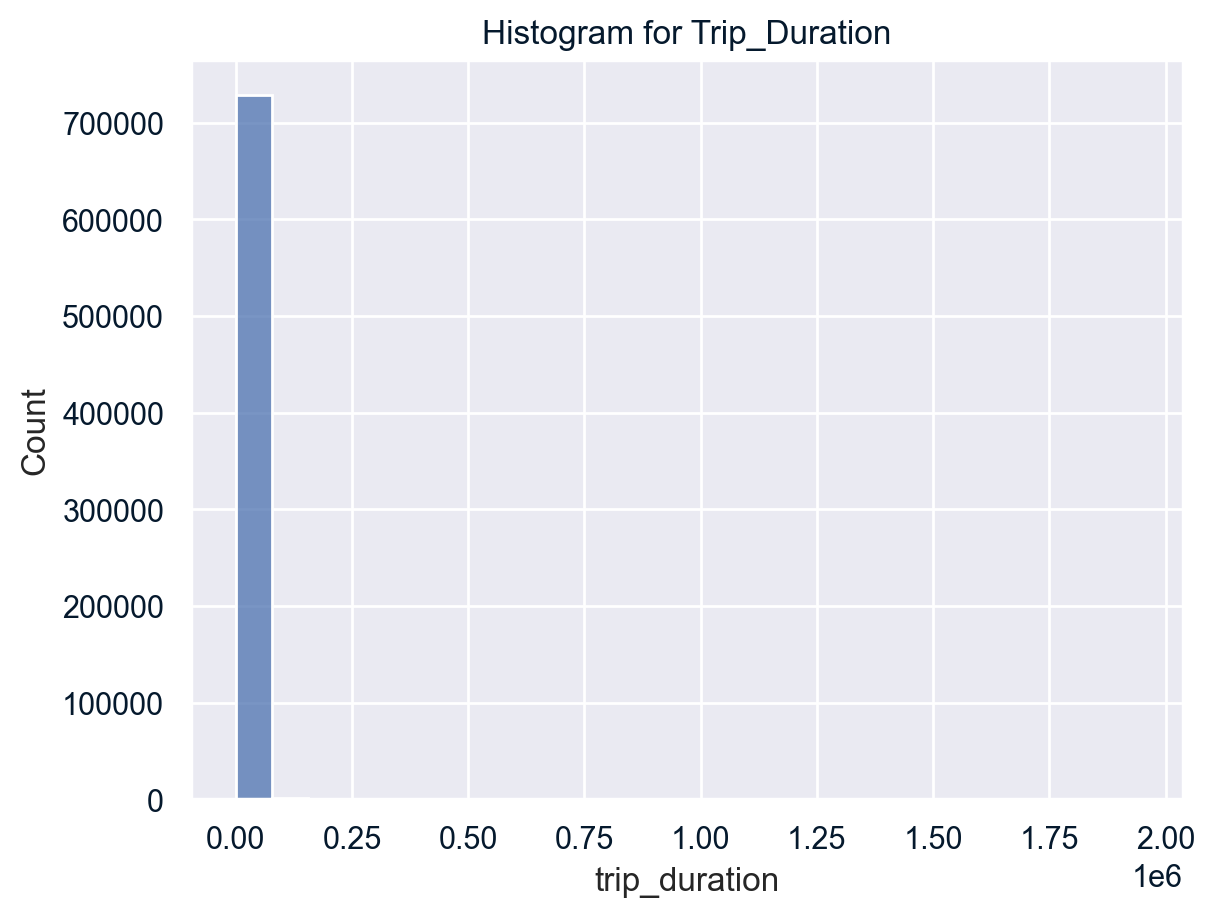

In [36]:
# Let's plot historgram to inspect distribution and outliers 
plt.title('Histogram for Trip_Duration')
sns.histplot(df['trip_duration'], kde=False, bins=25)

<Axes: title={'center': 'Boxplot for Trip_Duration'}, xlabel='trip_duration'>

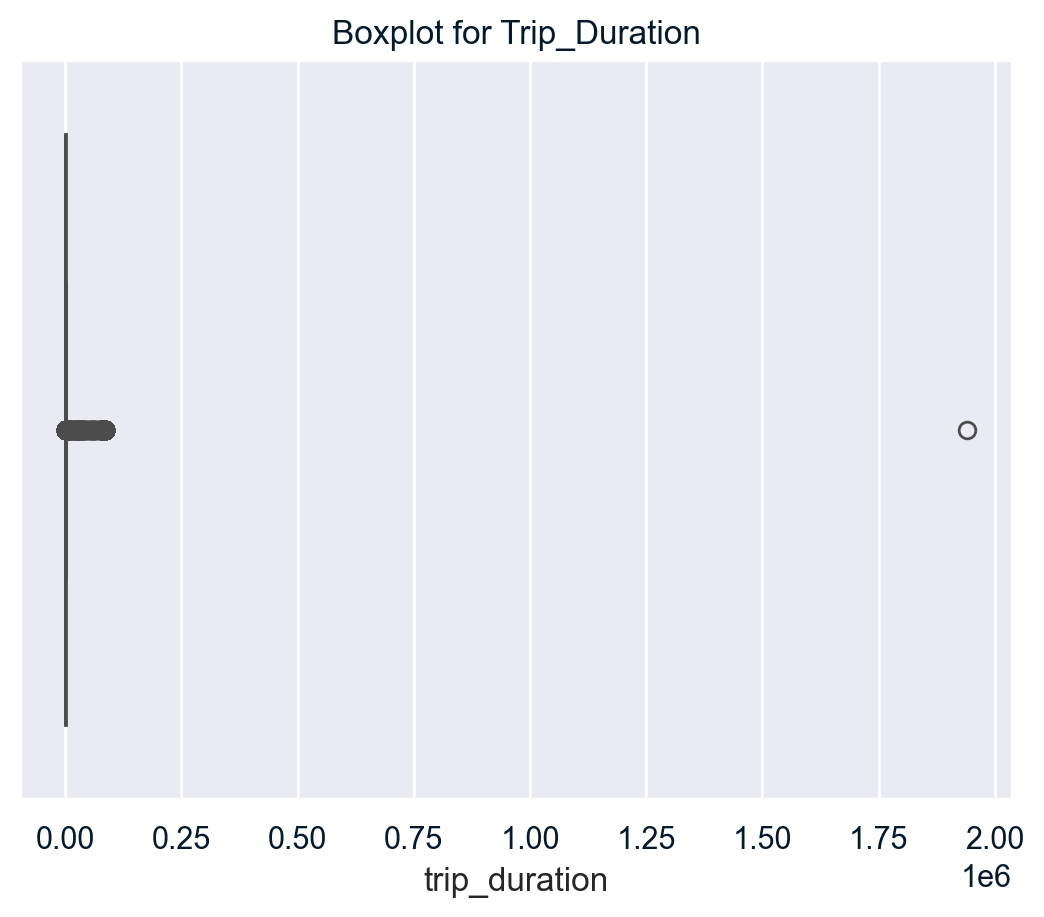

In [37]:
# Plot box plot for Trip_Duration

plt.title('Boxplot for Trip_Duration')
sns.boxplot(x = df['trip_duration'])

In [39]:
# Checking the outlier )maxium) row
df[df['trip_duration'] == df['trip_duration'].max()]

id  vendor_id  ...   distance average_speed
21813  id1864733          1  ...  12.519817      0.023236

[1 rows x 23 columns]

In [40]:
# Dropping the outlier from maxim

df.drop(df[df['trip_duration'] == 1939736.00].index, inplace = True)

In [41]:
# Let's check the new maximum
df[df['trip_duration'] == df['trip_duration'].max()]

id  vendor_id  ...   distance average_speed
259437  id0593332          2  ...  13.121578      0.546789

[1 rows x 23 columns]

### Step 4.4.2:  Univariate Analysis for vendor_id

In [43]:
df['vendor_id'].describe()

count    729321.000000
mean          1.535403
std           0.498745
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: vendor_id, dtype: float64

In [44]:
# Calculate additional statistics
add_stat('vendor_id')

Mode = 0    2
Name: vendor_id, dtype: int64
Skew = -0.14197025212279726
Kurtosis = -1.9798444475121897
Null hypothesis of normality is rejected.


<Axes: xlabel='vendor_id', ylabel='count'>

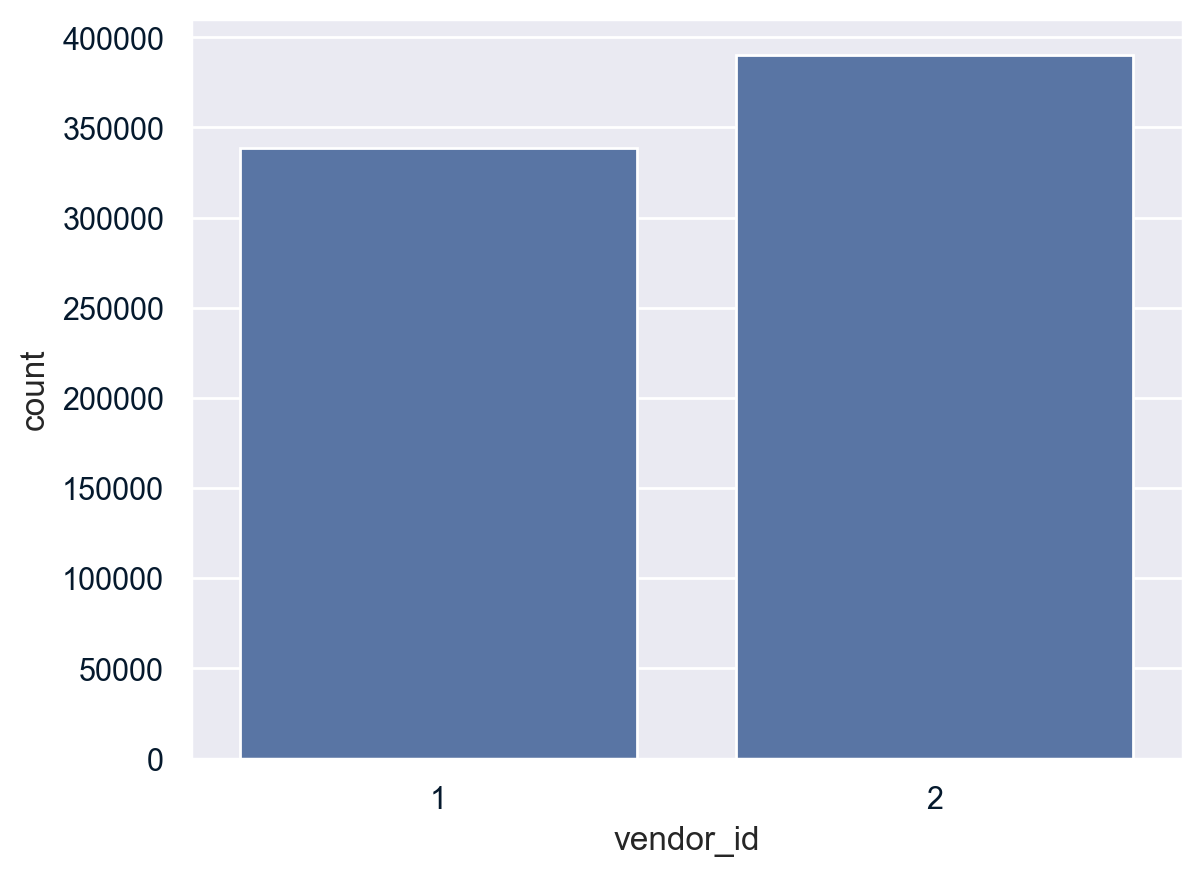

In [45]:
sns.countplot(x='vendor_id', data=df)

### Step 4.4.3:  Univariate Analysis for passenger_count

In [46]:
df['passenger_count'].describe()

count    729321.000000
mean          1.662056
std           1.312446
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: passenger_count, dtype: float64

In [47]:
df.passenger_count.value_counts()

passenger_count
1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: count, dtype: int64

<Axes: xlabel='passenger_count', ylabel='count'>

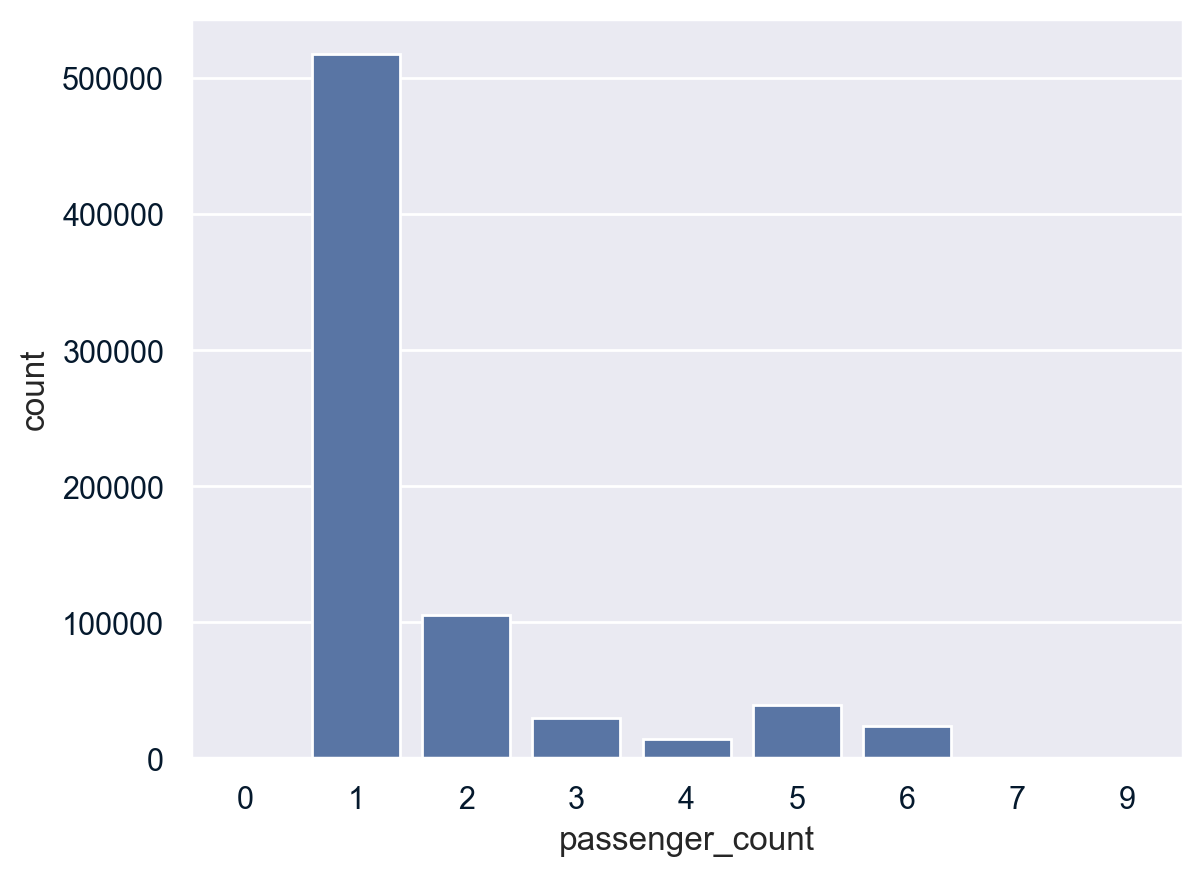

In [48]:
sns.countplot(x ='passenger_count', data=df)

From the above we can conclude that most of the trips will include just 1 passenger

### Step 4.4.4:  Univariate Analysis for pickup_by_day and dropoff_by_day

In [49]:
df['pickup_by_day'].describe(include=object)

count     729321
unique         7
top       Friday
freq      111744
Name: pickup_by_day, dtype: object

In [50]:
df['dropoff_by_day'].describe(include=object)

count     729321
unique         7
top       Friday
freq      111509
Name: dropoff_by_day, dtype: object

<Axes: xlabel='pickup_by_day', ylabel='count'>

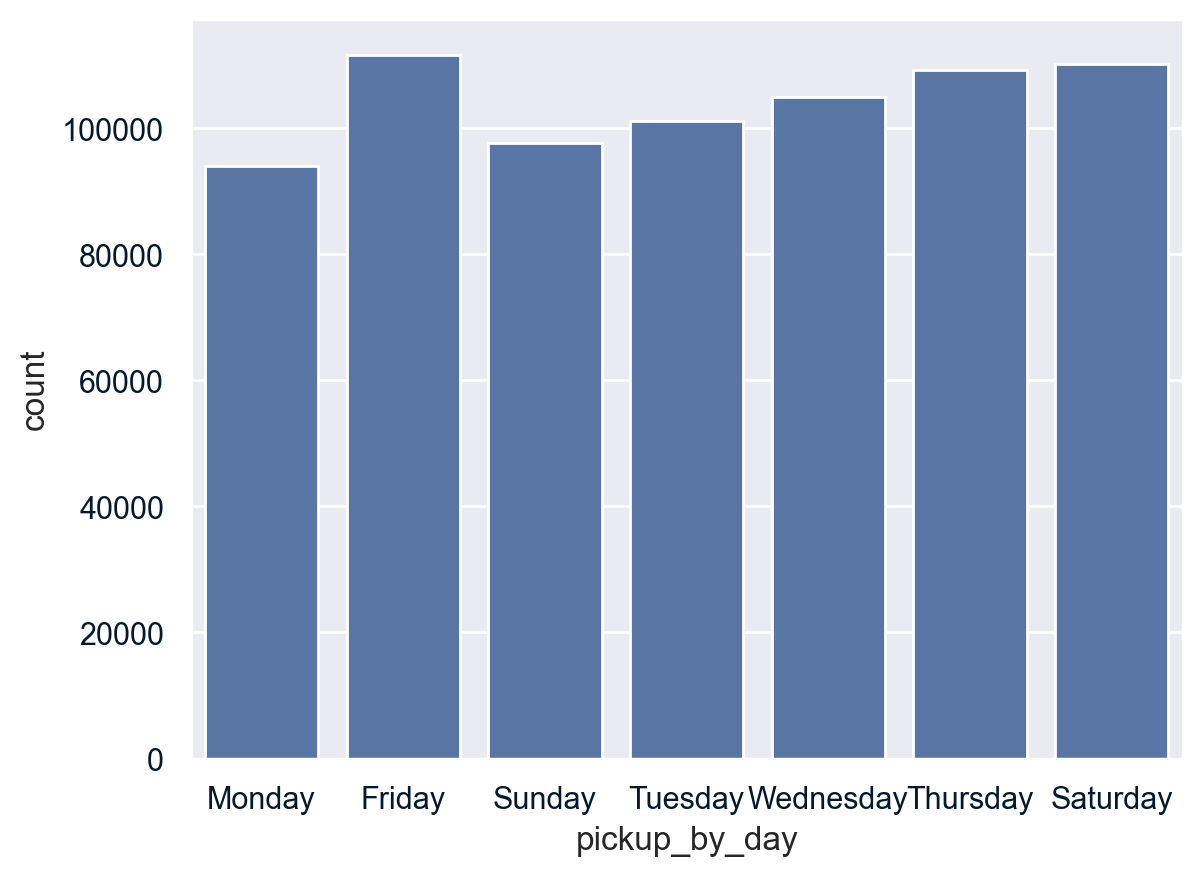

In [51]:
sns.countplot(x = 'pickup_by_day', data=df)

<Axes: xlabel='dropoff_by_day', ylabel='count'>

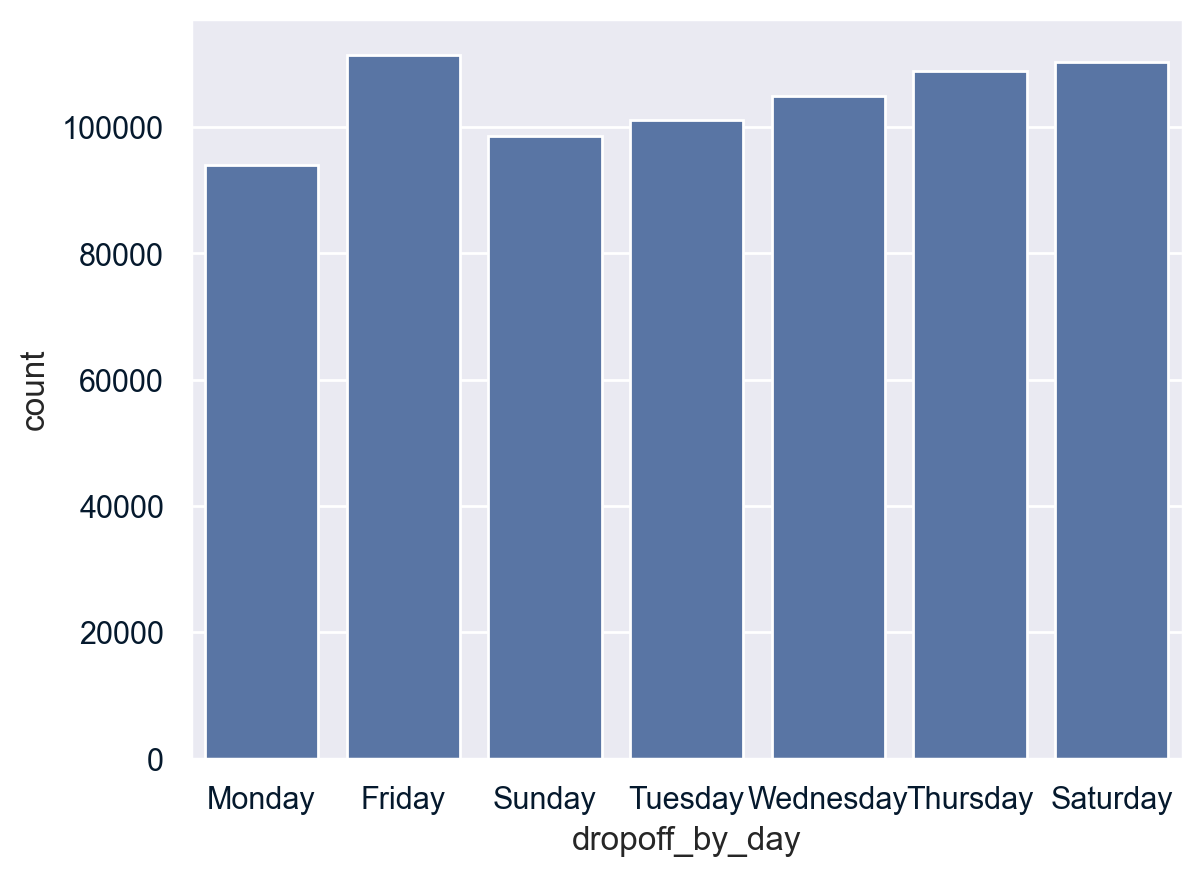

In [52]:
sns.countplot(x = 'dropoff_by_day', data=df)

From the above we can see that Friday is busiest day of the week followed by Saturday and Thursday

### Step 4.4.5:  Univariate Analysis for distance

In [53]:
df['distance'].describe()

count    729321.000000
mean          2.138213
std           2.704889
min           0.000000
25%           0.765962
50%           1.302192
75%           2.408731
max         771.065969
Name: distance, dtype: float64

In [54]:
# Now calculate additional statistics
add_stat('distance')

Mode = 0    0.0
Name: distance, dtype: float64
Skew = 40.983132210426184
Kurtosis = 9795.40134091124
Null hypothesis of normality is rejected.


In [56]:
df['distance'].value_counts() 

distance
0.000000    2901
0.000264      44
0.000264      31
0.000264      23
0.000791      22
            ... 
0.688348       1
1.670324       1
1.527005       1
6.416804       1
3.694577       1
Name: count, Length: 726198, dtype: int64

From the above, we can see that there are 2901 trips that have a distance of zero. We should furtehr investigate about finding reason for zero distance. 

In [57]:
# Looking at the store_and_forward column for the minium
df[df['distance'] == df['distance'].min()]

id  vendor_id  ... distance average_speed
263     id3155891          2  ...      0.0           0.0
327     id0786923          2  ...      0.0           0.0
795     id2323213          2  ...      0.0           0.0
1176    id3235868          1  ...      0.0           0.0
1257    id1865738          2  ...      0.0           0.0
...           ...        ...  ...      ...           ...
728720  id3423342          2  ...      0.0           0.0
728775  id2618105          2  ...      0.0           0.0
728838  id1232120          2  ...      0.0           0.0
729025  id3524028          2  ...      0.0           0.0
729308  id3477255          2  ...      0.0           0.0

[2901 rows x 23 columns]

From the above, we can observe that all of the trips with distance 0 have store_and_fwd_flag as No.

### Step 4.4.6:  Univariate Analysis for average_speed

In [58]:
df['average_speed'].describe()

count    729321.000000
mean          8.961097
std           7.668368
min           0.000000
25%           5.669598
50%           7.951604
75%          11.087719
max        3504.845312
Name: average_speed, dtype: float64

In [60]:
# lets calculate additional statistics
add_stat('average_speed')

Mode = 0    0.0
Name: average_speed, dtype: float64
Skew = 194.01366329779924
Kurtosis = 76874.06048746621
Null hypothesis of normality is rejected.


In [62]:
df['average_speed'].value_counts() 

average_speed
0.000000     2901
0.316285        7
0.094885        4
0.158142        4
0.118607        3
             ... 
11.002760       1
2.160466        1
5.635584        1
7.065835        1
10.866403       1
Name: count, Length: 726368, dtype: int64

Here again we are seeing that 2901 trips have average speed of zero. We alsos ee that the max speed is 3504.84 miles per hour which is not possible. We will need to explore both the minimums and maximum to see if they are outliers or real errors.

In [63]:
df[df['average_speed'] == df['average_speed'].max()]

id  vendor_id  ...    distance average_speed
244913  id2306955          1  ...  771.065969   3504.845312

[1 rows x 23 columns]

Here again we can see some inconsistencies in the max trip. We can see that the trip had a distance of 771 miles but a trip duration of only one hour. We believe this input is an error and most be removed from the dataset.

### Step 4.5:  Bivariate Analysis

In this section we will see the relationship between the target variable and selected features

<Axes: xlabel='vendor_id', ylabel='trip_duration'>

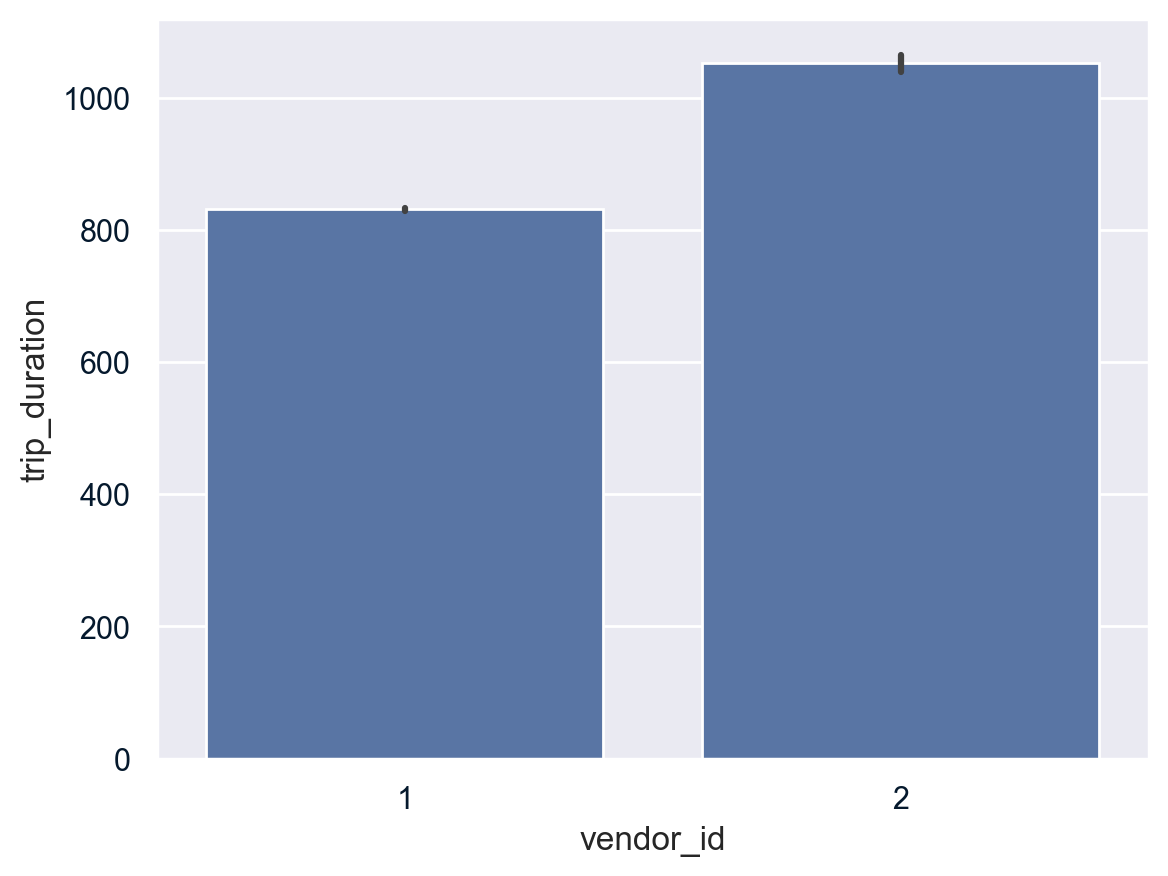

In [64]:
# Trip duration by vendor_id
sns.barplot(x='vendor_id', y='trip_duration', data=df)

<Axes: xlabel='passenger_count', ylabel='trip_duration'>

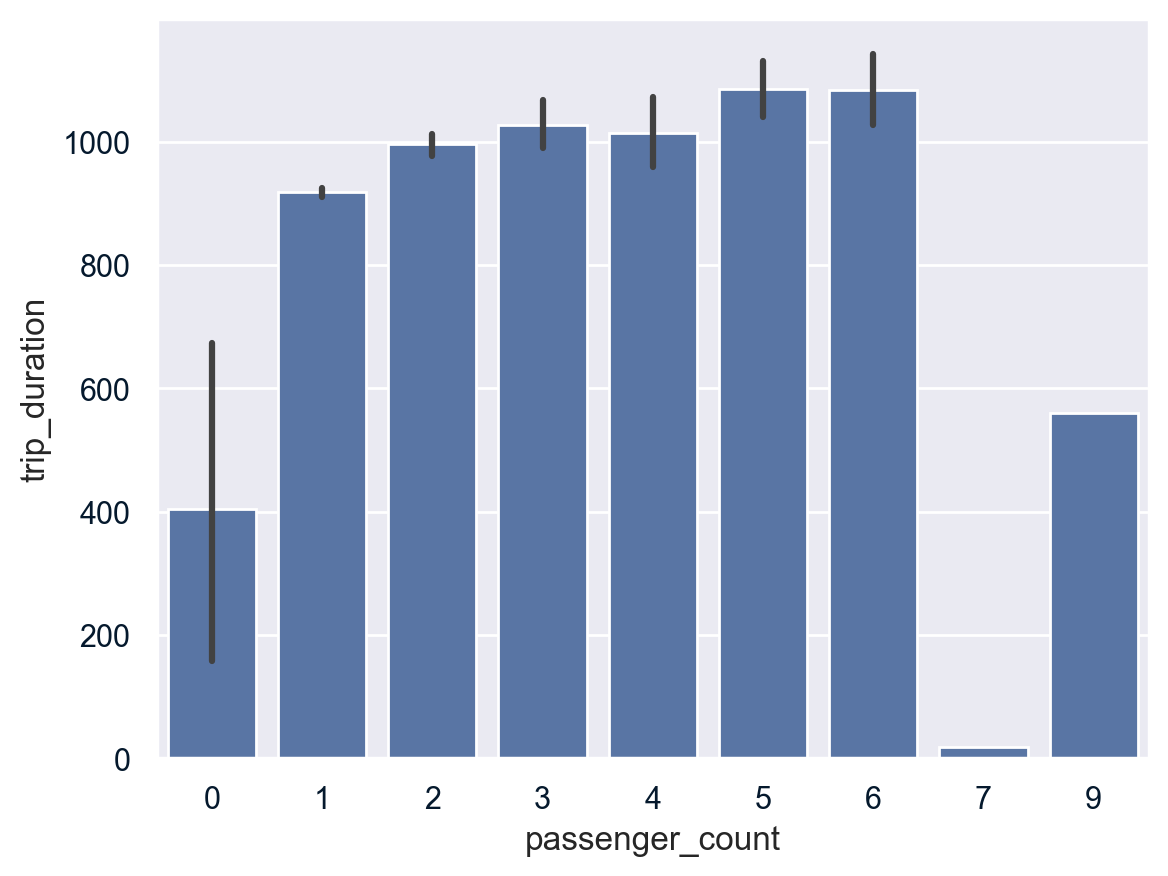

In [65]:
# Trip duration by passsenger count
sns.barplot(x='passenger_count',y='trip_duration', data=df)

<Axes: xlabel='pickup_by_day', ylabel='trip_duration'>

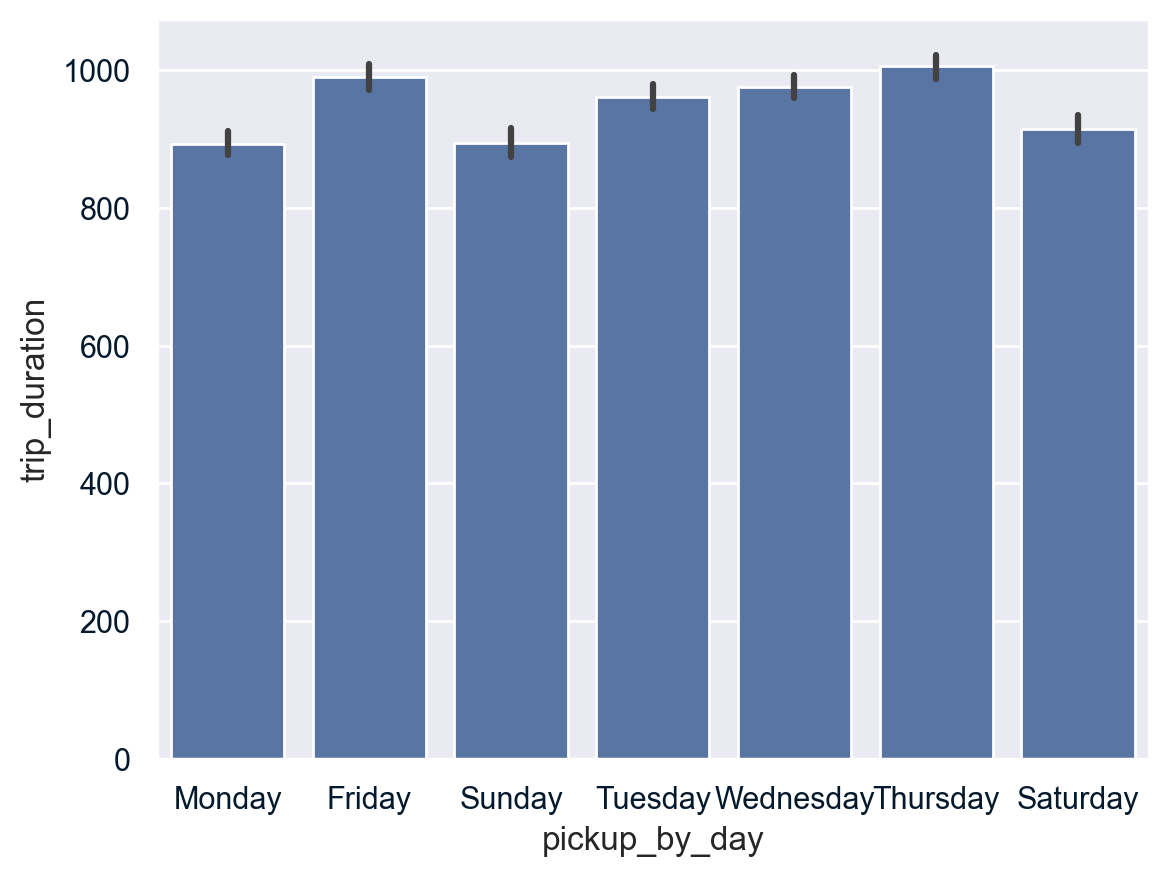

In [66]:
# Trip Duration by Day of the Week
sns.barplot(x="pickup_by_day", y='trip_duration', data=df)

<Axes: xlabel='pickup_part_of_day', ylabel='trip_duration'>

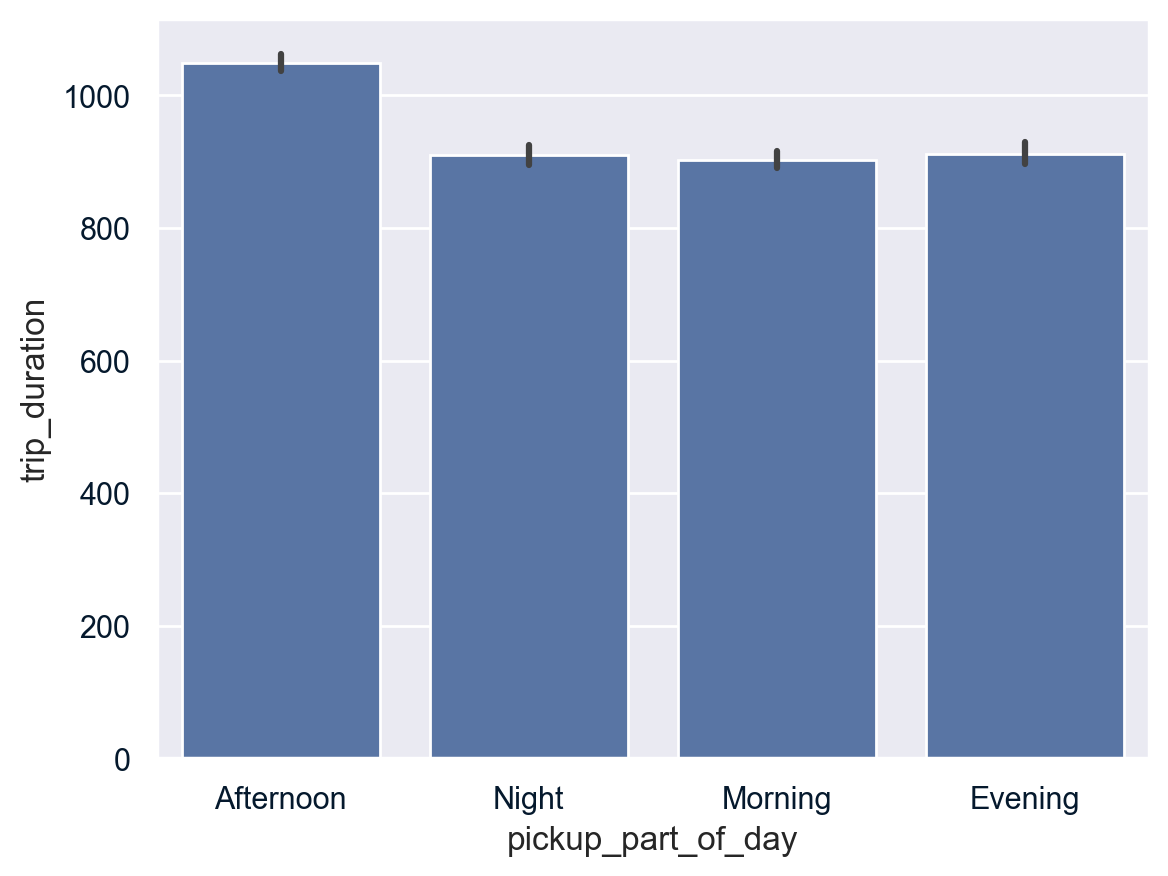

In [67]:
# Trip Duration by Day of the Week
sns.barplot(x="pickup_part_of_day", y='trip_duration', data=df)

<Axes: xlabel='pickup_by_day', ylabel='average_speed'>

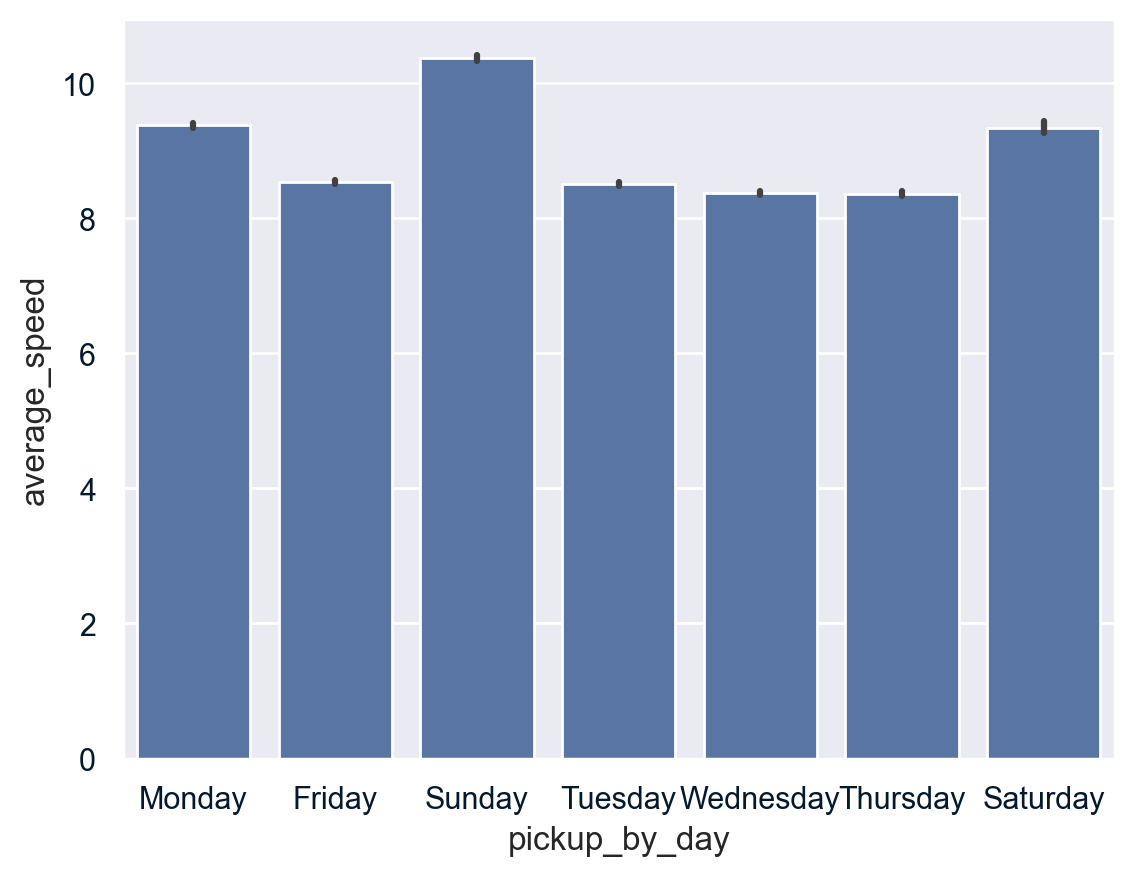

In [68]:
# Average Speed (Miles per Hour) by Day
sns.barplot(x="pickup_by_day", y='average_speed', data=df)

<Axes: xlabel='pickup_part_of_day', ylabel='trip_duration'>

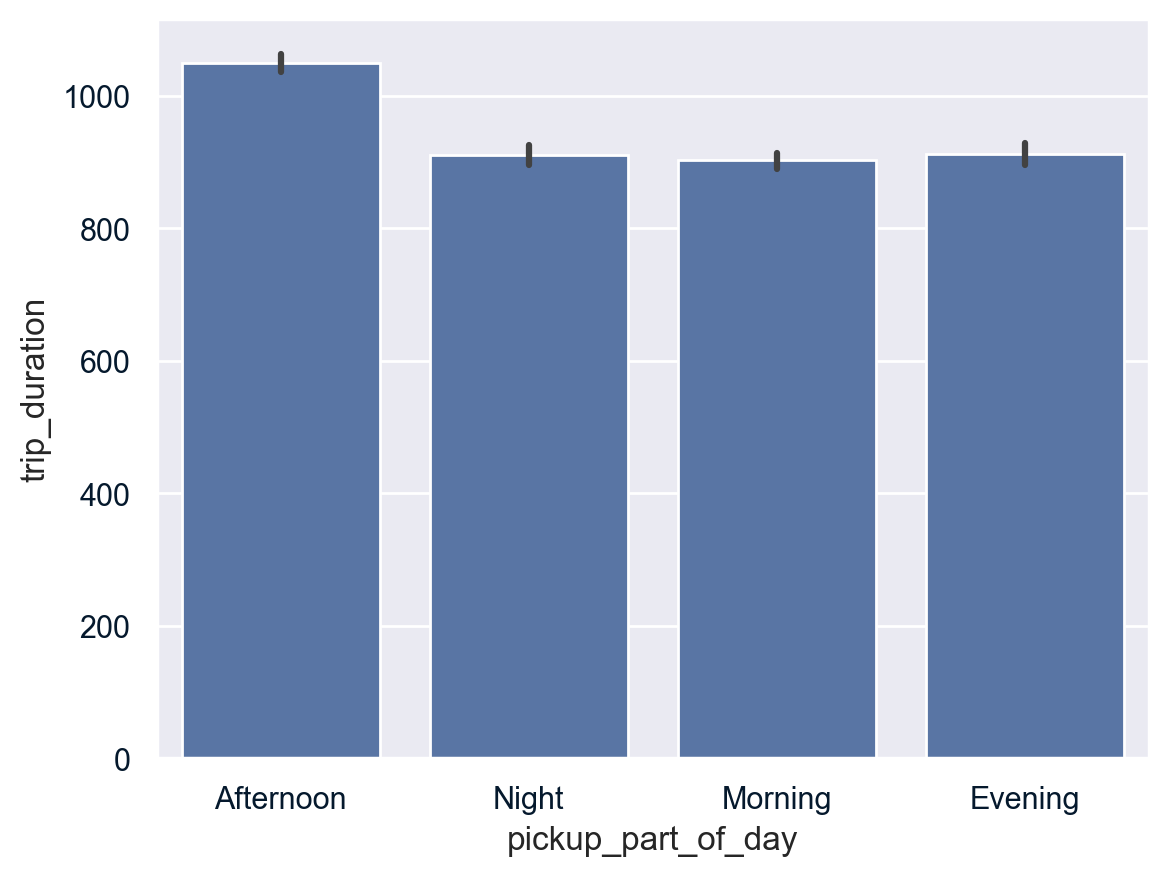

In [69]:
# Trip Duration by Day of the Week
sns.barplot(x="pickup_part_of_day", y='trip_duration', data=df)

<Axes: xlabel='pickup_by_hour', ylabel='trip_duration'>

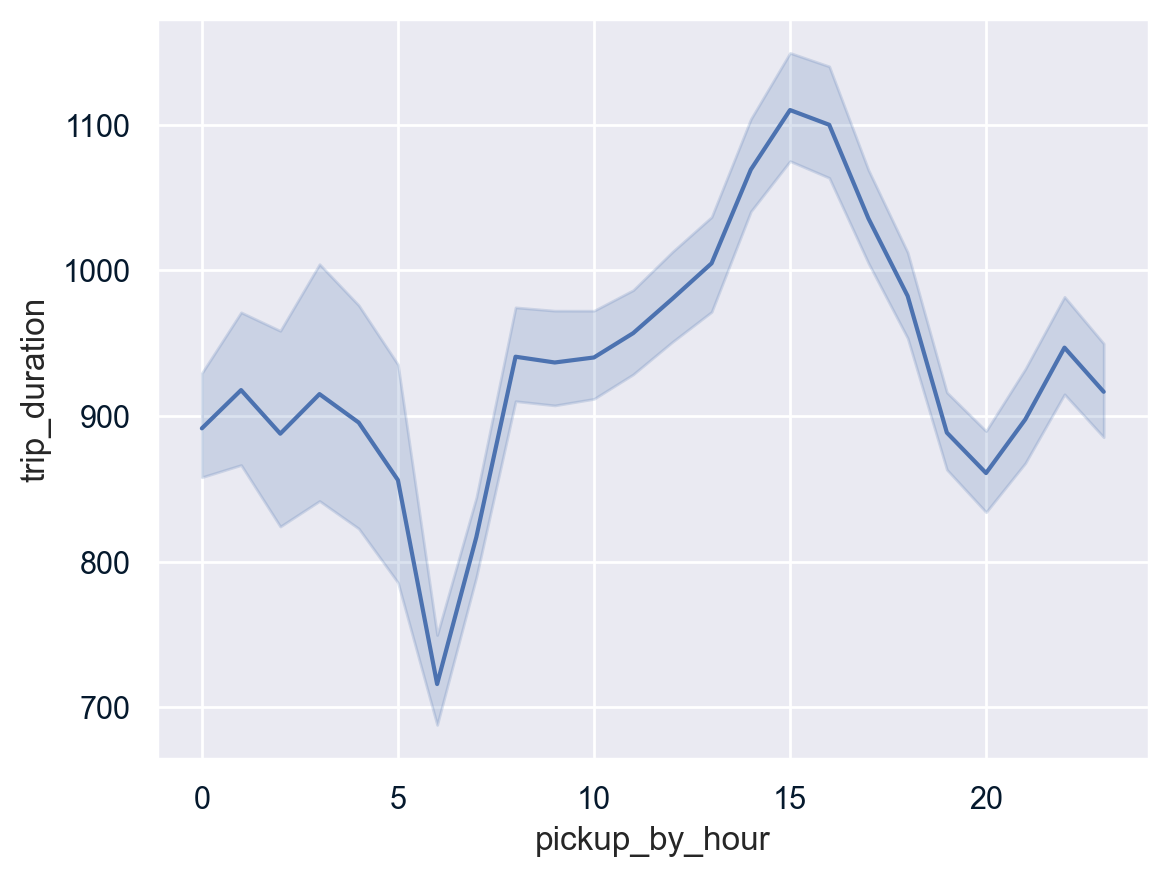

In [70]:
# Trip Duration per hour
sns.lineplot(x='pickup_by_hour', y='trip_duration', data=df)

From the above we can observe that Afternoon is the busiest time of the day. Most of the demand starts between 2pm and 330pm. Each trip last on average around 16.67 minutes.

### Step 4.6:  Multivariate Analysis

We will calculate the correlation of feature and we will use heat map.

In [73]:
# Removing non-numeric columns before calculating the correlation
numeric_df = df.select_dtypes(include=[float, int])
# Calculating the correlation
corr = numeric_df.corr()

In [74]:
corr

vendor_id  passenger_count  ...  distance  average_speed
vendor_id            1.000000         0.286462  ...  0.006516       0.001307
passenger_count      0.286462         1.000000  ...  0.009178      -0.002637
pickup_longitude     0.008202         0.001164  ...  0.251472       0.095279
pickup_latitude      0.002857        -0.004698  ... -0.128440       0.116820
dropoff_longitude    0.002371        -0.000027  ...  0.132353       0.045955
dropoff_latitude     0.005260        -0.003944  ... -0.153765      -0.054264
trip_duration        0.035205         0.016520  ...  0.152153      -0.033842
pickup_by_month     -0.005365        -0.001482  ...  0.016589      -0.016811
dropoff_by_month    -0.005338        -0.001498  ...  0.016767      -0.016785
pickup_by_weekday    0.000786         0.025757  ...  0.007792       0.044303
dropoff_by_weekday   0.000899         0.025940  ...  0.008230       0.043575
pickup_by_hour       0.009769         0.009849  ... -0.016258      -0.064611
dropoff_by_hour      0.009701         0.009214  ... -0.020932      -0.072875
distance             0.006516         0.009178  ...  1.000000       0.575085
average_speed        0.001307        -0.002637  ...  0.575085       1.000000

[15 rows x 15 columns]

<Axes: >

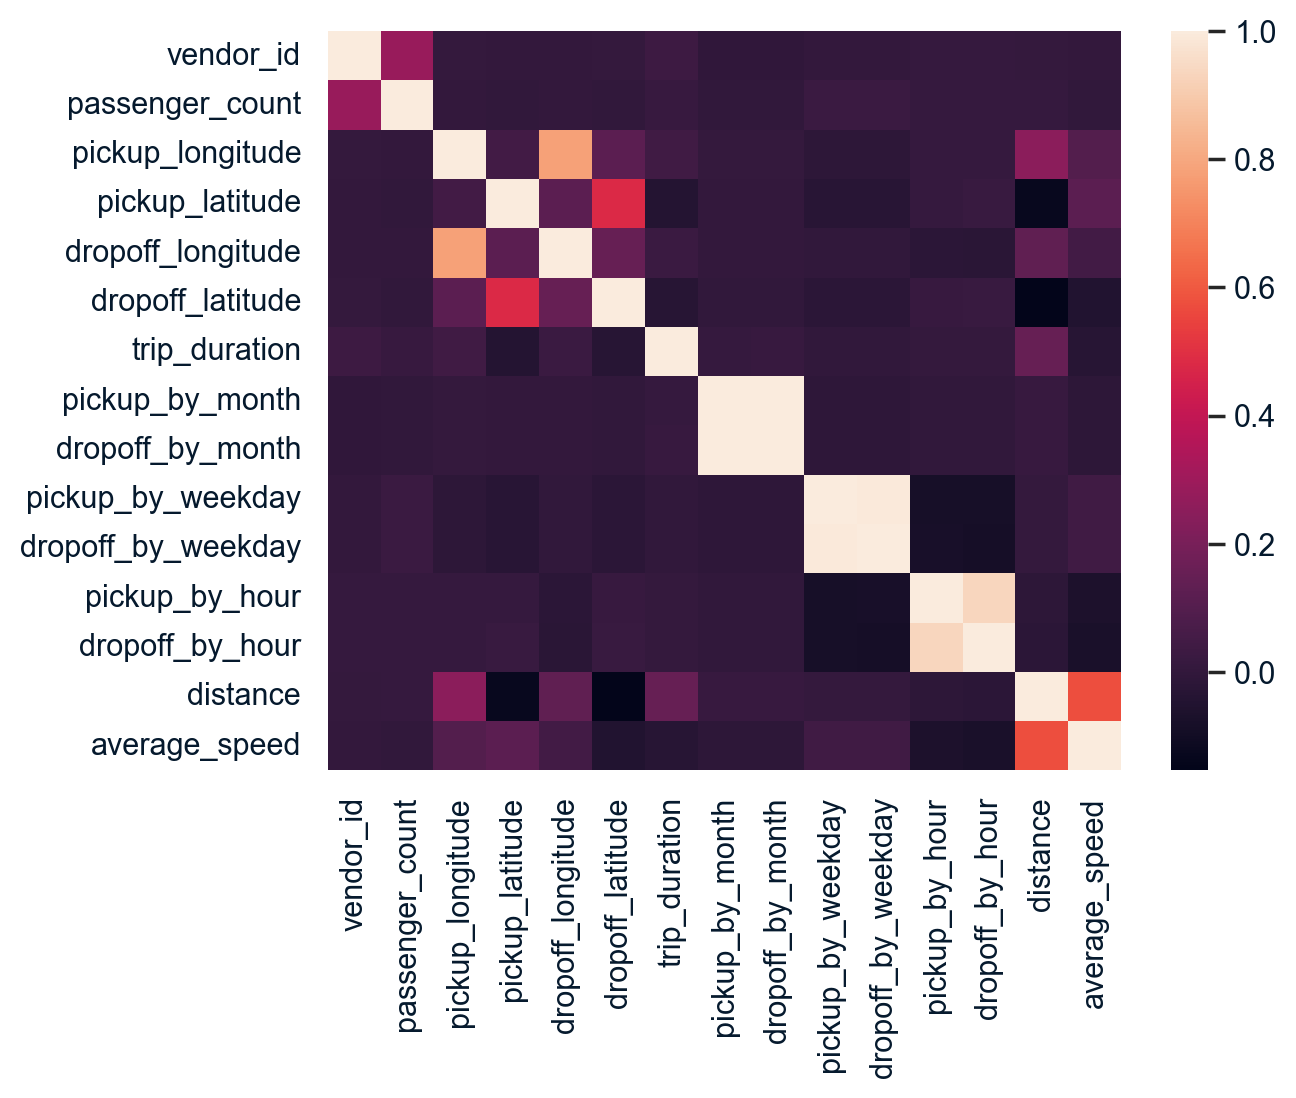

In [75]:
# Visualizing the relationship based on correlation
sns.heatmap(corr)